In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

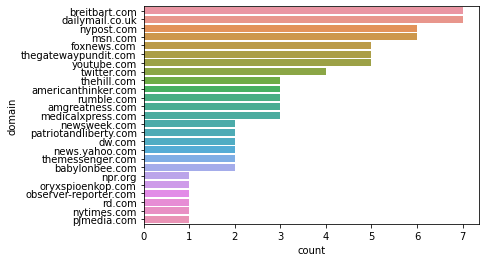

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

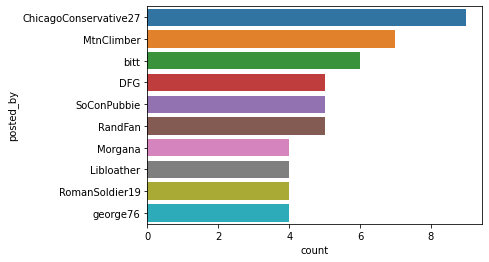

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  MtnClimber                 2      1   
amgreatness.com      MtnClimber                 3      1   
babylonbee.com       DFG                        2      1   
breitbart.com        ChicagoConservative27      4      1   
dailymail.co.uk      Libloather                 2      1   
                     Morgana                    4      1   
                     george76                   1      1   
foxnews.com          Libloather                 2      1   
                     george76                   1      1   
msn.com              RandFan                    1      1   
                     RomanSoldier19             4      1   
news.yahoo.com       bitt                       1      1   
nypost.com           DFG                        2      1   
                     ChicagoConservative27      2      1   
thegatewaypundit.com bitt                       4      1   
thehill.com          ChicagoConservative27      2      1   
twitter.com          RandFan                    4      1   
youtube.com          MtnClimber                 1      1   

                                                                       
                                                             top freq  
domain               posted_by                                         
americanthinker.com  MtnClimber              americanthinker.com    2  
amgreatness.com      MtnClimber                  amgreatness.com    3  
babylonbee.com       DFG                          babylonbee.com    2  
breitbart.com        ChicagoConservative27         breitbart.com    4  
dailymail.co.uk      Libloather                  dailymail.co.uk    2  
                     Morgana                     dailymail.co.uk    4  
                     george76                    dailymail.co.uk    1  
foxnews.com          Libloather                      foxnews.com    2  
                     george76                        foxnews.com    1  
msn.com              RandFan                             msn.com    1  
                     RomanSoldier19                      msn.com    4  
news.yahoo.com       bitt                         news.yahoo.com    1  
nypost.com           DFG                              nypost.com    2  
                     ChicagoConservative27            nypost.com    2  
thegatewaypundit.com bitt                   thegatewaypundit.com    4  
thehill.com          ChicagoConservative27           thehill.com    2  
twitter.com          RandFan                         twitter.com    4  
youtube.com          MtnClimber                      youtube.com    1

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
